In [1]:
import os
import cv2
import tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

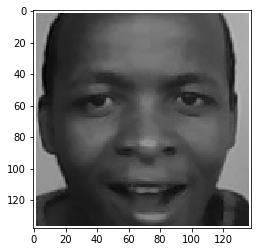

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/train'

CATEGORIES = ["albertndege", "francisngethe",  "johnnzuki", "moseskinyua", "ronaldsamuel", "ashleywangare",  "harrysuter", "keithmartin", "patrickwainaina", "tracywanjiku", "elviswahome", "joebrian", "kennedythiga","markadalla", "geraldcastrol", "jameso", "rodneyosodo", "pricechiuri", "emmanuel", "johnnjoroge", "lynnsaidi", "richardwamalwa"]

for category in CATEGORIES:
    path = os.path.join(base_dir, category) #with the iterator named cartegory we are able to loop over files of diffrent people.
    for img in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        img_array = cv2.imread(os.path.join(path,img))  # convert to array cv.CV_BGR2GRAY
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY))  # shows the image in a scale ##, cmap='gray'
        plt.imshow(img_array)
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
#print(img_array)

In [4]:
print(img_array.shape)

(138, 138, 3)


#### Resizing the images

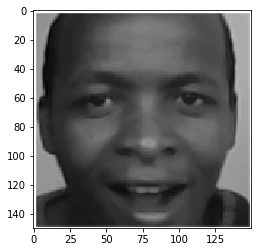

In [5]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)) ## COLOR_BGR2RGB ## cmap='gray'
plt.imshow(new_array)
plt.show()

In [6]:
print(new_array.shape)

(150, 150, 3)


### Creating training data

In [7]:
training_data = []  

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(base_dir, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_num = CATEGORIES.index(category)  # get an index for each cartegory
        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array   #,cv2.IMREAD_GRAYSCALE
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 224/224 [00:00<00:00, 1888.89it/s]

5057


In [8]:
import random

random.shuffle(training_data)

In [9]:
#for sample in training_data[:10]:
 #   print(sample[1])

In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X)
y = np.array(y)


In [11]:
X.shape

(5057, 150, 150, 3)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Transfer Learning

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

#img_height = img_width = 100 
#channels = 3


#datagen = ImageDataGenerator(rescale=1.0/255)
model = VGG16(weights='imagenet', include_top = False, input_shape = (150, 150, 3))           

In [15]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [17]:
# CREATE A "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = tensorflow.keras.Sequential()
for l in model.layers:
    model.trainable = False
    new_model.add(l)


In [18]:
new_model.add(Flatten())
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(22, activation='softmax'))

In [19]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5057 images belonging to 22 classes.


In [22]:
for data_batch, labels_batch in train_generator:

    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 22)


#### validation data

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/validation'

In [24]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 395 images belonging to 22 classes.


In [25]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

#### Saving the model

In [26]:
history = new_model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=20, 
        validation_data = validation_generator,
        validation_steps=50)

Epoch 1/20
15/15 [==============================] - 433s 29s/step - loss: 4.3325 - accuracy: 0.0896 - val_loss: 2.6147 - val_accuracy: 0.2778
Epoch 2/20
15/15 [==============================] - 434s 29s/step - loss: 2.4694 - accuracy: 0.2479 - val_loss: 2.1359 - val_accuracy: 0.1718
Epoch 3/20
15/15 [==============================] - 443s 30s/step - loss: 2.0161 - accuracy: 0.3729 - val_loss: 1.6601 - val_accuracy: 0.4723
Epoch 4/20
15/15 [==============================] - 426s 28s/step - loss: 1.8828 - accuracy: 0.5212 - val_loss: 1.2602 - val_accuracy: 0.6480
Epoch 5/20
15/15 [==============================] - 423s 28s/step - loss: 1.2789 - accuracy: 0.6438 - val_loss: 1.0498 - val_accuracy: 0.7885
Epoch 6/20
15/15 [==============================] - 436s 29s/step - loss: 1.1928 - accuracy: 0.6333 - val_loss: 0.8519 - val_accuracy: 0.7853
Epoch 7/20
15/15 [==============================] - 433s 29s/step - loss: 1.0040 - accuracy: 0.7125 - val_loss: 0.7587 - val_accuracy: 0.7326
Epoch 

In [27]:
 new_model.save_weights('4.2 facial recognition model')

In [28]:
model_json = new_model.to_json()
with open("new_model.json", "w") as json_file:
    json_file.write(model_json)

#### Plotting the results

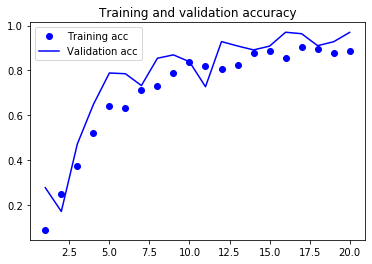

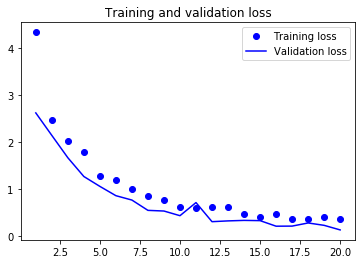

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing the model

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir =  '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')
test_loss, test_acc = new_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 198 images belonging to 22 classes.
test acc: 0.92424244


### Creating / preparing test data

In [31]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import os

base_directory = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

CATEGORIES = ["albertndege", "francisngethe",  "johnnzuki", "moseskinyua", "ronaldsamuel", "ashleywangare",  "harrysuter", "keithmartin", "patrickwainaina", "tracywanjiku", "elviswahome", "joebrian", "kennedythiga","markadalla", "geraldcastrol", "jameso", "rodneyosodo", "pricechiuri", "emmanuel", "johnnjoroge", "lynnsaidi", "richardwamalwa"]
IMG_SIZE = 150

test_data = []  

def create_test_data():
    for category in CATEGORIES: 

        path = os.path.join(base_directory, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_nums = CATEGORIES.index(category)  # get an index for each cartegory
        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_in_array = cv2.imread(os.path.join(path,img))  # convert to array   #,cv2.IMREAD_GRAYSCALE
                a_new_array = cv2.resize(img_in_array, (150, 150))  # resize to normalize data size
                test_data.append([a_new_array, class_nums])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_test_data()

#print(len(test_data)) 

100%|██████████| 9/9 [00:00<00:00, 3473.70it/s]


#### Splitting the test data into actual images and labels

In [32]:
test_images = []
test_labels = []

for features,label in test_data:
    test_images.append(features)
    test_labels.append(label)
    
test_images = np.array(test_images)    
test_labels = np.array(test_labels)

In [33]:
test_images.shape

(198, 150, 150, 3)

### Making predictions

In [70]:
models_predictions = new_model.predict(test_generator)

In [71]:
#print(CATEGORIES[np.argmax(models_predictions[8])])

In [72]:
#CATEGORIES[np.argmax(models_predictions[8])]

In [95]:
type(test_img)

numpy.ndarray

In [73]:
test_img, test_labels = next(test_generator)

In [85]:
CATEGORIES[np.argmax(test_img)]

'albertndege'

In [88]:
CATEGORIES[np.argmax(models_predictions[8])]

'richardwamalwa'

In [94]:
models_predictions[3]

array([1.8059224e-06, 3.2462116e-04, 6.2073232e-04, 7.0200773e-04,
       1.2011974e-05, 7.3497198e-05, 3.0132668e-04, 6.4705137e-06,
       1.9547563e-04, 2.6325253e-04, 9.9530232e-01, 3.7728751e-04,
       5.2935158e-09, 1.7983517e-04, 5.2626259e-05, 5.5425203e-10,
       3.6210637e-05, 3.3450198e-07, 1.4450622e-09, 1.1982606e-03,
       3.5188702e-04, 1.1328614e-08], dtype=float32)

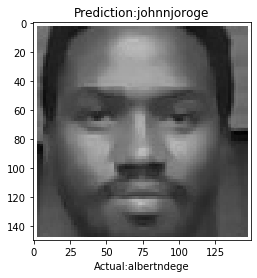

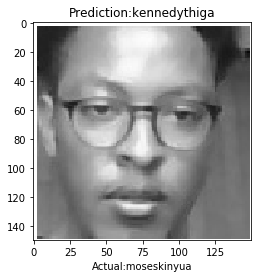

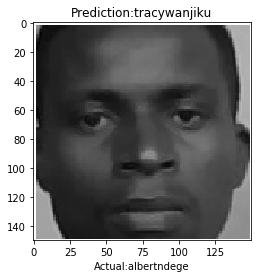

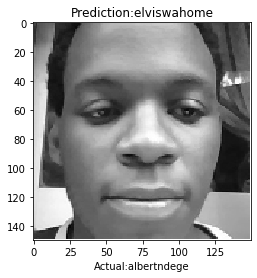

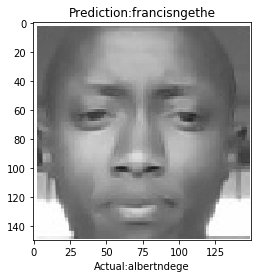

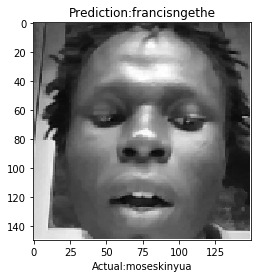

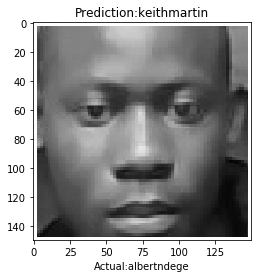

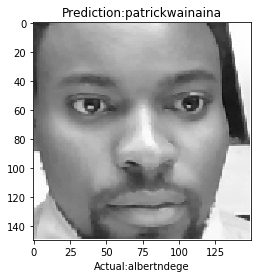

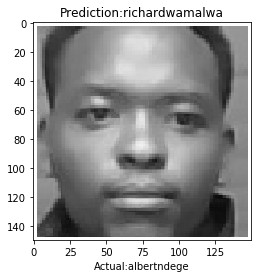

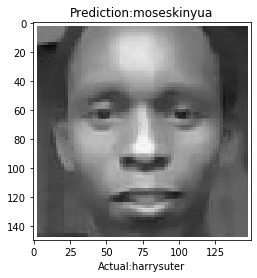

In [97]:
for i in range(10):
    plt.grid(False)
    plt.imshow(test_img[i], cmap = plt.cm.binary)
    plt.xlabel("Actual:" + CATEGORIES[np.argmax(test_img[i])]) 
    plt.title("Prediction:" + CATEGORIES[np.argmax(models_predictions[i])])  
    plt.show()